# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [113]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts, Canny\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

In [115]:
# 1. Built-in Sobel, Prewill, Roberts, Canny
original_img = io.imread('circuit.tif')

In [116]:
# Utility functions for using the needed operators
def use_roberts(img):
    return roberts(img)
def use_prewitt(img):
    return prewitt(img)
def use_sobel_horizontal(img):
    return sobel_h(img)
def use_sobel_vertical(img):
    return sobel_v(img)
def use_sobel(img):
    return sobel(img)
def use_canny(img,sigma=1):
    return canny(img,sigma=sigma)


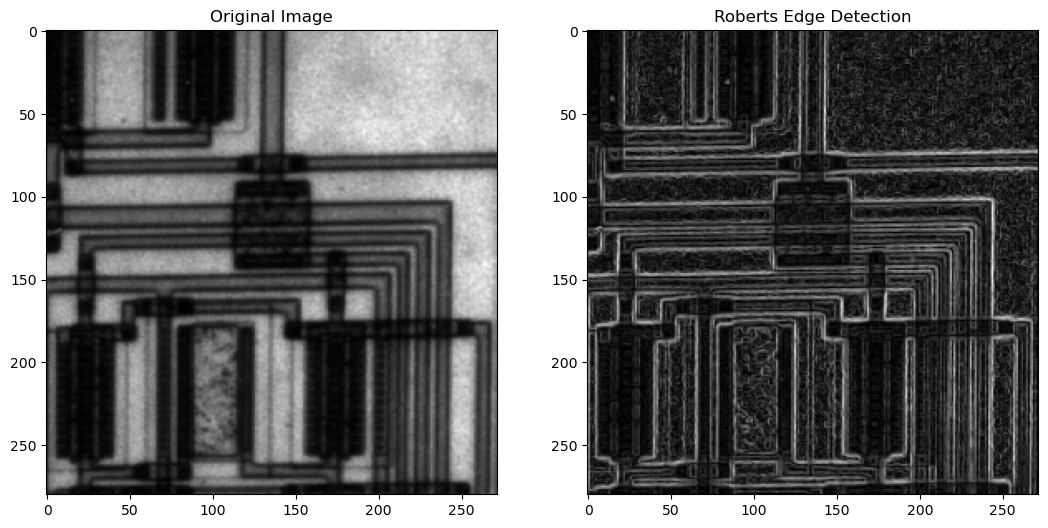

In [117]:
roberts_img = use_roberts(img=original_img)
show_images(
    [
        original_img,
        roberts_img,
    ],
    [
        "Original Image",
        "Roberts Edge Detection",
    ],
)

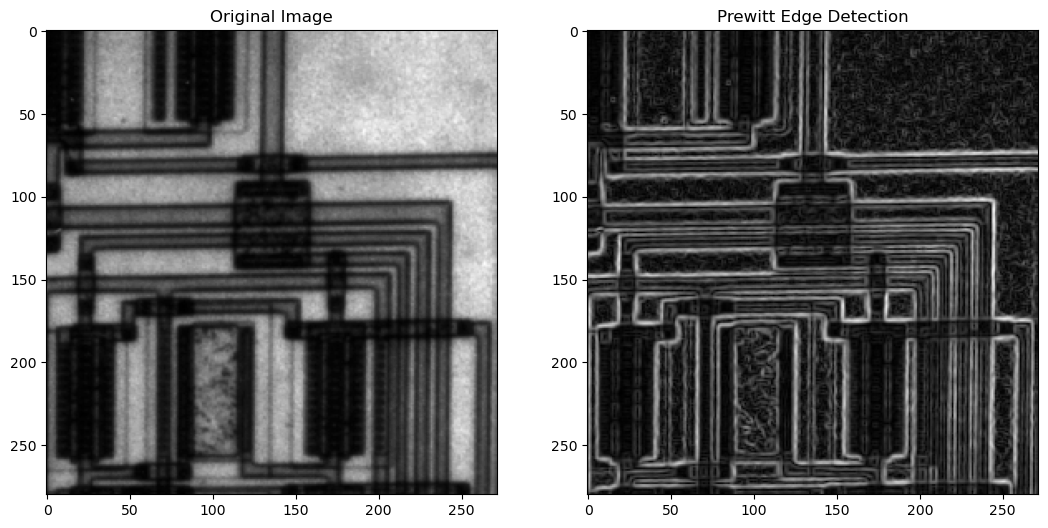

In [118]:
prewitt_img = use_prewitt(img=original_img)
show_images(
    [
        original_img,
        prewitt_img,
    ],
    [
        "Original Image",
        "Prewitt Edge Detection",
    ],
)

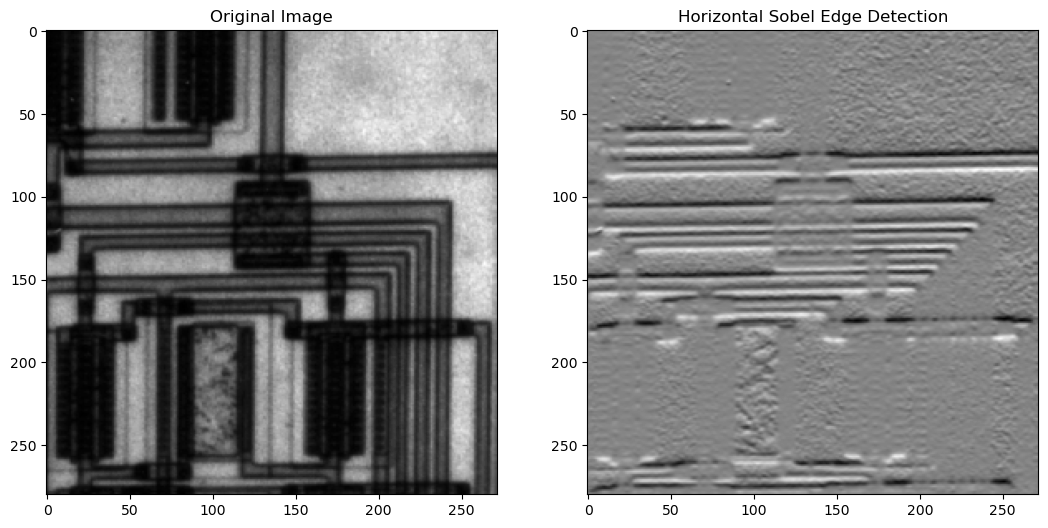

In [119]:
horizontal_sobel_img = use_sobel_horizontal(img=original_img)
show_images(
    [
        original_img,
        horizontal_sobel_img,
    ],
    [
        "Original Image",
        "Horizontal Sobel Edge Detection",
    ],
)

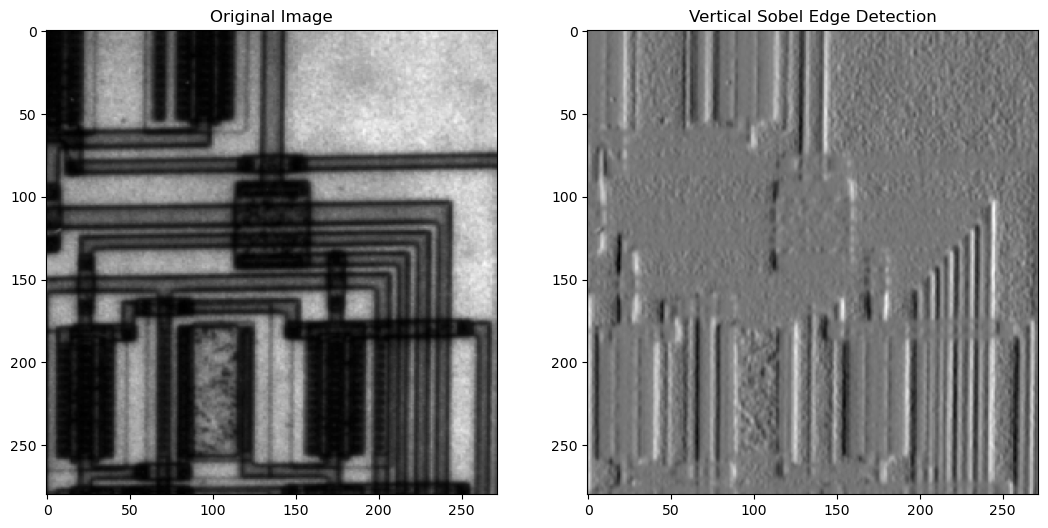

In [120]:
vertical_sobel_img = use_sobel_vertical(img=original_img)
show_images(
    [
        original_img,
        vertical_sobel_img,
    ],
    [
        "Original Image",
        "Vertical Sobel Edge Detection",
    ],
)

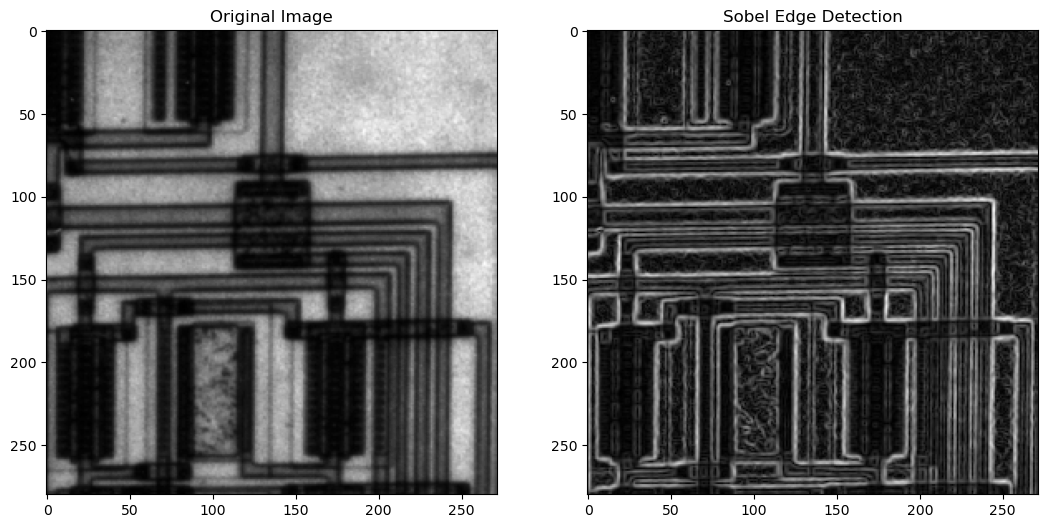

In [121]:
sobel_img = use_sobel(img=original_img)
show_images(
    [
        original_img,
        sobel_img,
    ],
    [
        "Original Image",
        "Sobel Edge Detection",
    ],
)

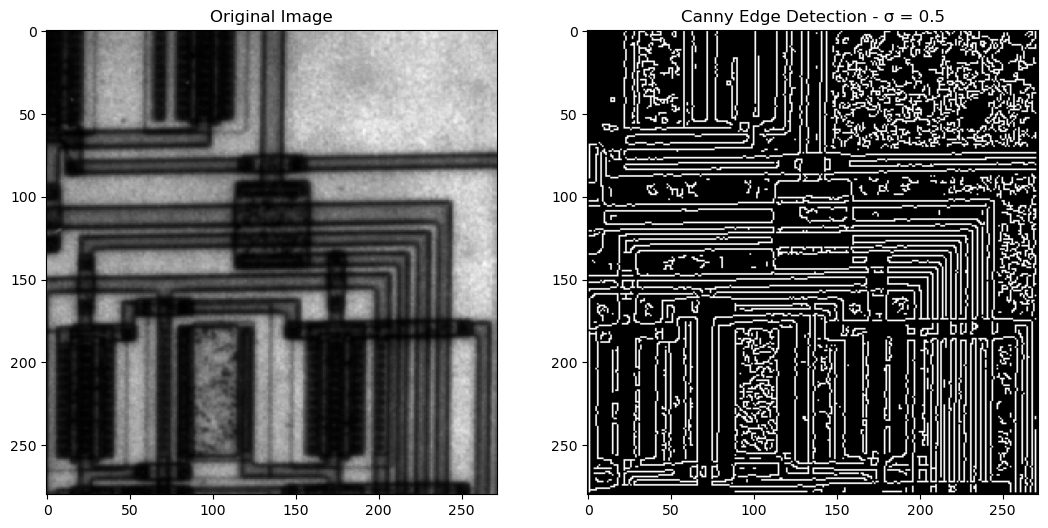

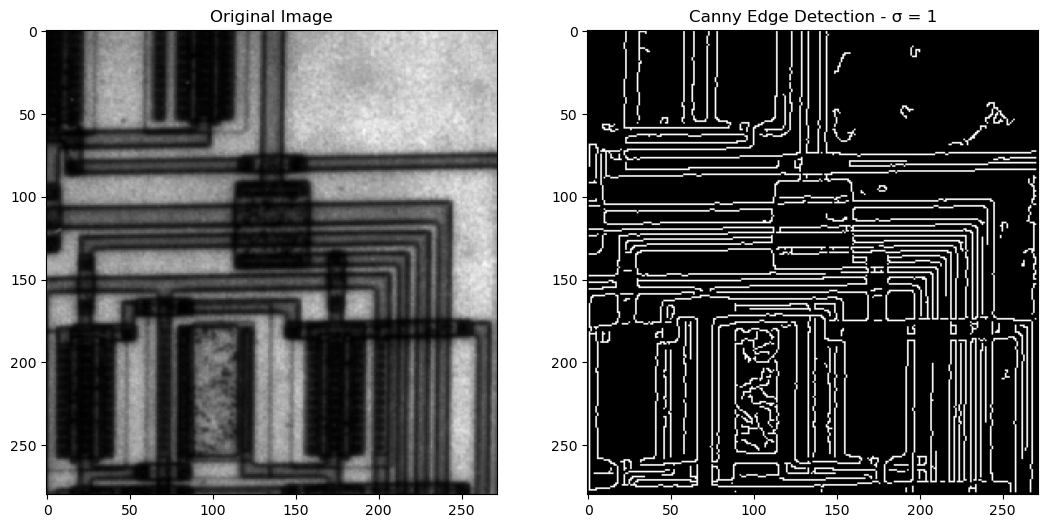

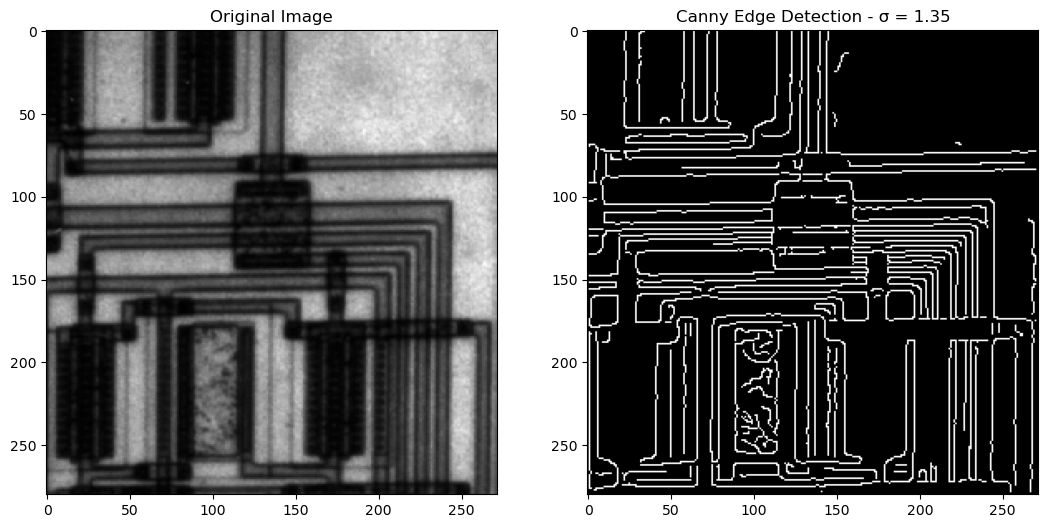

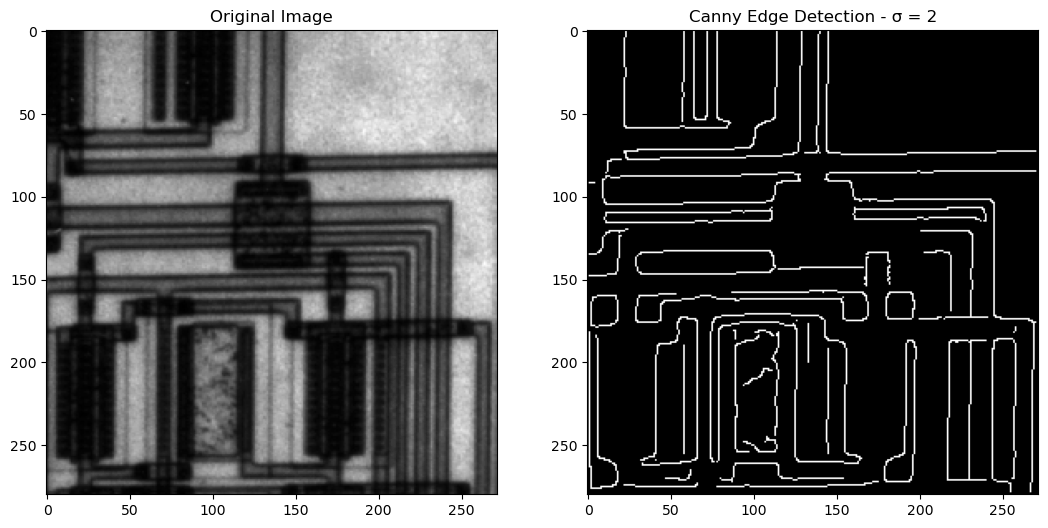

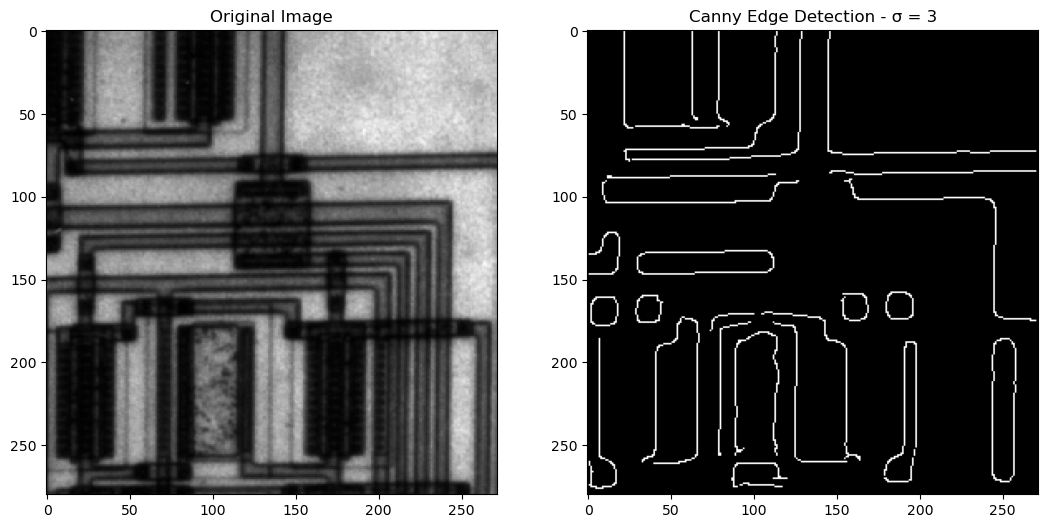

In [122]:
canny_img_low_sigma = use_canny(img=original_img,sigma=0.5)
canny_img_moderate_sigma_1 = use_canny(img=original_img)
canny_img_moderate_sigma_2 = use_canny(img=original_img,sigma=1.35)
canny_img_high_sigma = use_canny(img=original_img,sigma=2)
canny_img_super_high_sigma = use_canny(img=original_img,sigma=3)

show_images(
    [
        original_img,
        canny_img_low_sigma,
    ],
    [
        "Original Image",
        "Canny Edge Detection - σ = 0.5",
    ],
)
show_images(
    [
        original_img,
        canny_img_moderate_sigma_1,
    ],
    [
        "Original Image",
        "Canny Edge Detection - σ = 1",
    ],
)
show_images(
    [
        original_img,
        canny_img_moderate_sigma_2,
    ],
    [
        "Original Image",
        "Canny Edge Detection - σ = 1.35",
    ],
)
show_images(
    [
        original_img,
        canny_img_high_sigma,
    ],
    [
        "Original Image",
        "Canny Edge Detection - σ = 2",
    ],
)
show_images(
    [
        original_img,
        canny_img_super_high_sigma,
    ],
    [
        "Original Image",
        "Canny Edge Detection - σ = 3",
    ],
)

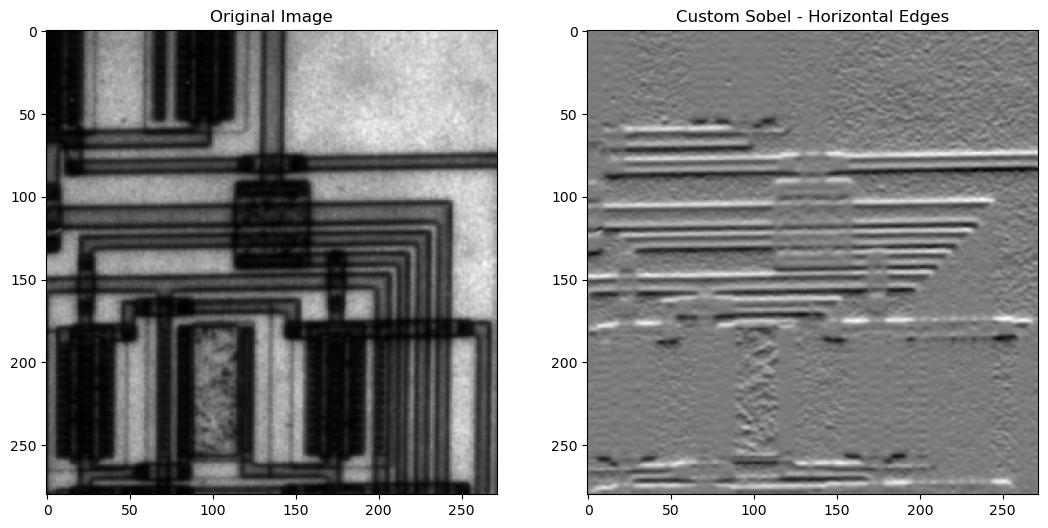

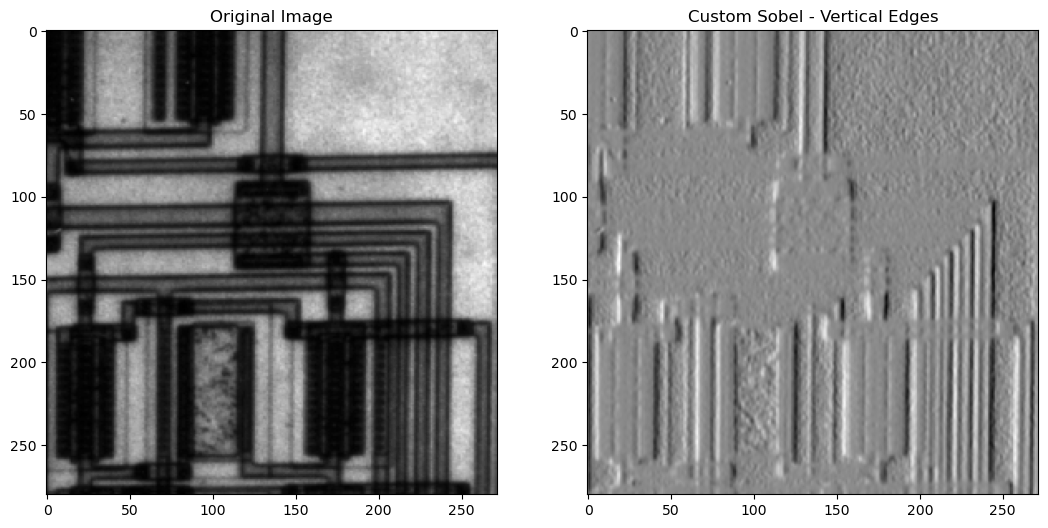

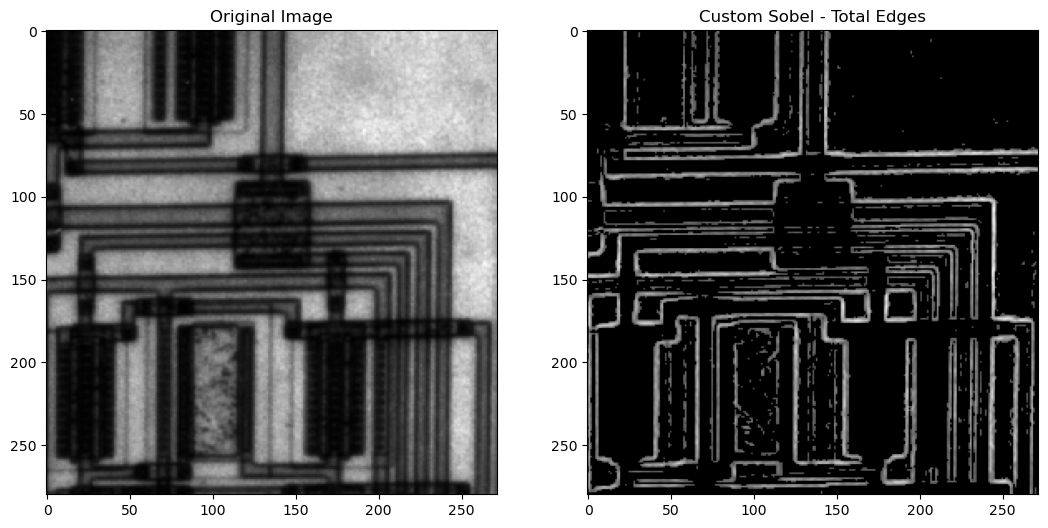

In [123]:
# 2. Custom Sobel (V-H-Both)
def custom_sobel(img,hx,hy,threshold=0):
    x_values_img = convolve2d(img,hx,mode='same',boundary='symm')
    y_values_img = convolve2d(img,hy,mode='same',boundary='symm')

    filtered_img = np.sqrt(x_values_img**2 + y_values_img**2)
    filtered_img[filtered_img < threshold] = 0

    return x_values_img, y_values_img, filtered_img

hx = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
hy = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

threshold =100

x_values_img, y_values_img, custom_sobel_img = custom_sobel(img=original_img, hx=hx, hy=hy,threshold=threshold)

show_images([original_img, x_values_img], ["Original Image", "Custom Sobel - Horizontal Edges"])
show_images([original_img,y_values_img],['Original Image','Custom Sobel - Vertical Edges'])
show_images([original_img,custom_sobel_img],['Original Image','Custom Sobel - Total Edges'])

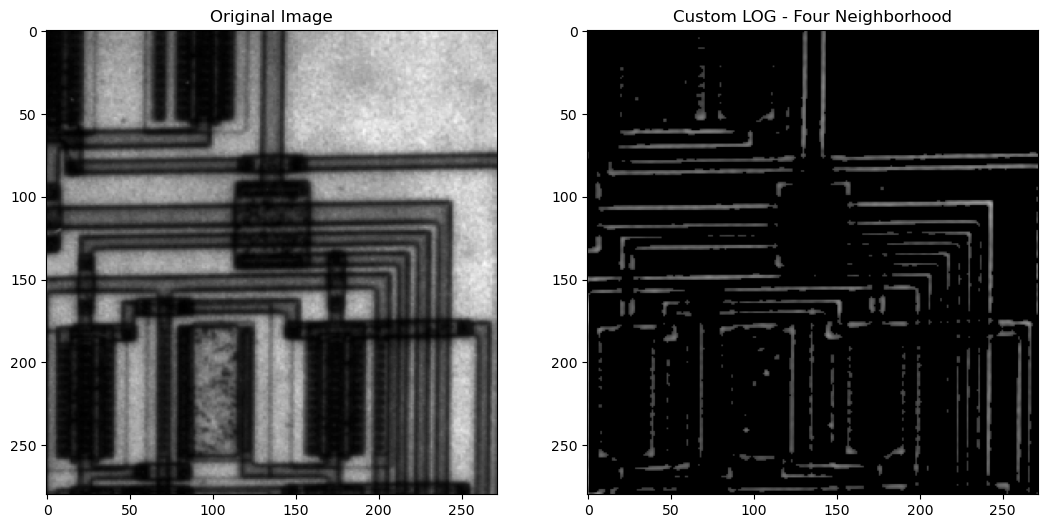

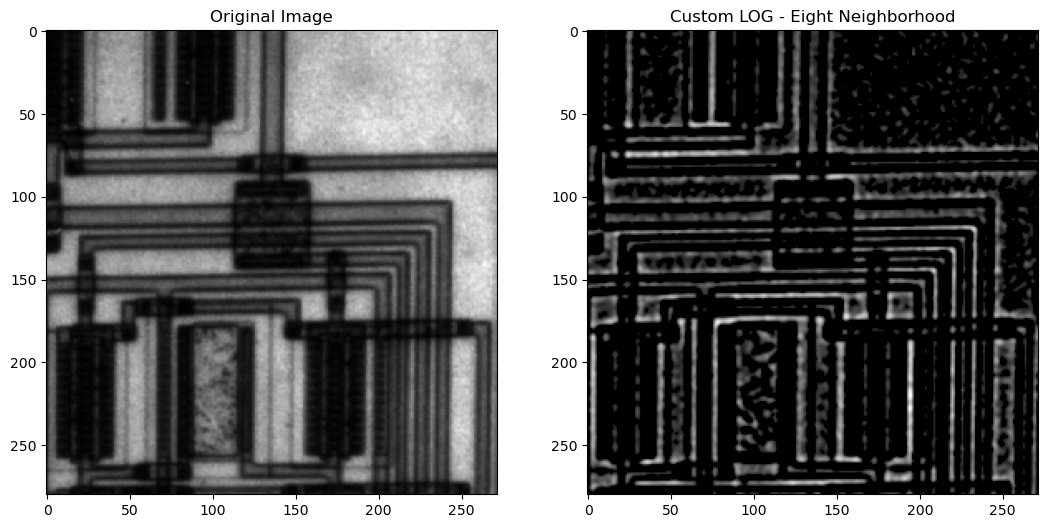

In [157]:
# 3. Custom LoG
def custom_log(img, first_kernel,second_kernel,threshold=0,sigma=1):
    img = gaussian(img,sigma=sigma,mode='nearest')

    first_filtered_img = convolve2d(img,first_kernel,mode='same',boundary='symm')
    second_filtered_img = convolve2d(img,second_kernel,mode='same',boundary='symm')

    first_filtered_img[first_filtered_img < threshold]= 0
    second_filtered_img[second_filtered_img < threshold]= 0

    return first_filtered_img, second_filtered_img

eight_neighbors_kernel = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])
four_neighbors_kernel = np.array([[0, 1, 0],[1, -4, 1],[0, 1, 0]])

threshold= 5
sigma = 1.7

original_img = (
    (original_img - np.min(original_img))
    / (np.max(original_img) - np.min(original_img))
    * 255
)

custom_log_four_neighbors, custom_log_eight_neighbors = custom_log(img=original_img,first_kernel=four_neighbors_kernel,second_kernel=eight_neighbors_kernel,threshold=threshold,sigma=sigma)

show_images([original_img,custom_log_four_neighbors],['Original Image','Custom LOG - Four Neighborhood'])
show_images([original_img,custom_log_eight_neighbors],['Original Image','Custom LOG - Eight Neighborhood'])

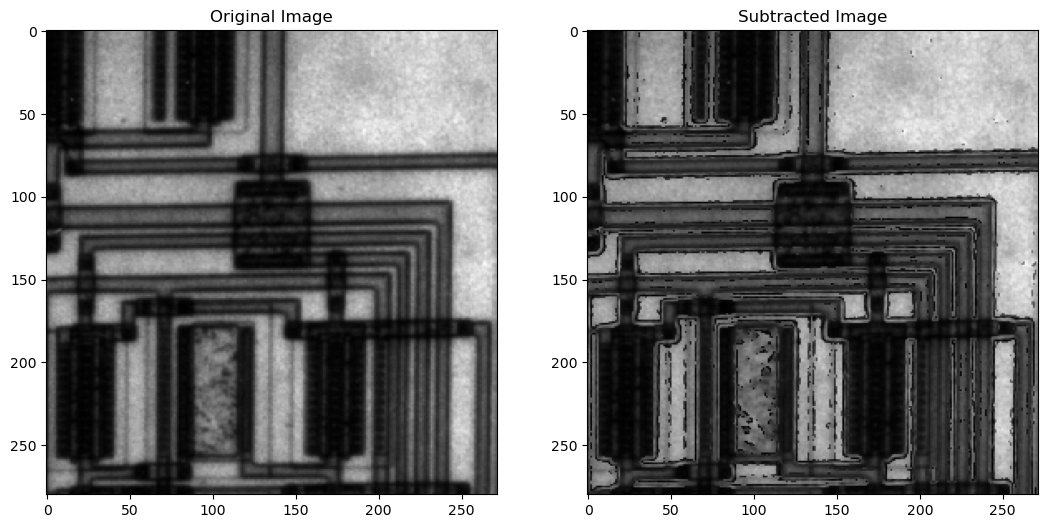

In [190]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''

subtracted_img = np.abs(original_img - custom_sobel_img * 0.8)
subtracted_img = np.clip(subtracted_img, 0, 255)
show_images([original_img,subtracted_img],['Original Image','Subtracted Image'])